In [1]:
import sklearn.datasets
import sklearn.manifold
import fcmeans
import numpy as np
from tqdm import tqdm

import matplotlib.pyplot as plt

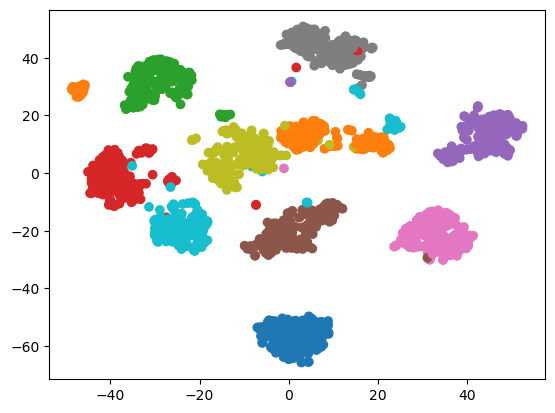

In [2]:
data, labels = sklearn.datasets.load_digits(return_X_y=True)

tSNE = sklearn.manifold.TSNE()
data_map = tSNE.fit_transform(data)
plt.scatter(data_map[:, 0], data_map[:, 1], c=labels, cmap="tab10")

In [3]:
fuzziness = np.linspace(1.05, 3, 400)
predictions = np.empty((data_map.shape[0], 10, 400), dtype="float64")
for i in tqdm(range(400)):
    fcm = fcmeans.FCM(n_clusters=10, m=fuzziness[i], random_state=i)
    fcm.fit(data_map)
    predictions[:, :, i] = fcm.soft_predict(data_map)

100%|██████████| 400/400 [00:24<00:00, 16.30it/s]


In [6]:
np.save("predictions.npy", predictions.T)

In [7]:
# Encode the labels as a Zig matrix
labels_matrix = np.zeros((data_map.shape[0], 10), dtype="int64")
for i in range(len(labels)):
    labels_matrix[i, labels[i]] = 1
np.save("labels.npy", labels_matrix.T)